***Statistics Part 2 (P)***

1 . Write a Python program to perform a Z-test for comparing a sample mean to a known population mean and
interpret the results ?

In [1]:
import numpy as np
from scipy import stats

sample = [105, 110, 98, 102, 100, 97, 108, 112, 101, 103]

population_mean = 100
population_std = 5
n = len(sample)

sample_mean = np.mean(sample)

z = (sample_mean - population_mean) / (population_std / np.sqrt(n))

p_value = 2 * (1 - stats.norm.cdf(abs(z)))

print(f"Sample Mean = {sample_mean:.2f}")
print(f"Z-score = {z:.3f}")
print(f"P-value = {p_value:.4f}")

alpha = 0.05

if p_value < alpha:
    print("Result: Reject the null hypothesis. There is a significant difference.")
else:
    print("Result: Fail to reject the null hypothesis. No significant difference found.")


Sample Mean = 103.60
Z-score = 2.277
P-value = 0.0228
Result: Reject the null hypothesis. There is a significant difference.


2 . Simulate random data to perform hypothesis testing and calculate the corresponding P-value using Python ?

In [2]:
import numpy as np
from scipy import stats

np.random.seed(42)

population_mean = 100
population_std = 15
sample_size = 30

sample = np.random.normal(loc=102, scale=15, size=sample_size)

sample_mean = np.mean(sample)

z_score = (sample_mean - population_mean) / (population_std / np.sqrt(sample_size))

p_value = 2 * (1 - stats.norm.cdf(abs(z_score)))

print(f"Sample Mean       : {sample_mean:.2f}")
print(f"Z-score           : {z_score:.3f}")
print(f"P-value           : {p_value:.4f}")

alpha = 0.05
if p_value < alpha:
    print("Result: Reject the null hypothesis.")
else:
    print("Result: Fail to reject the null hypothesis.")


Sample Mean       : 99.18
Z-score           : -0.300
P-value           : 0.7640
Result: Fail to reject the null hypothesis.


3 . Implement a one-sample Z-test using Python to compare the sample mean with the population mean ?

In [3]:
import numpy as np
from scipy.stats import norm

sample_data = [105, 110, 98, 102, 100, 97, 108, 112, 101, 103]

population_mean = 100
population_std = 5

sample_mean = np.mean(sample_data)
n = len(sample_data)

z = (sample_mean - population_mean) / (population_std / np.sqrt(n))

p_value = 2 * (1 - norm.cdf(abs(z)))

print(f"Sample Mean       : {sample_mean:.2f}")
print(f"Z-score           : {z:.3f}")
print(f"P-value           : {p_value:.4f}")

alpha = 0.05
if p_value < alpha:
    print("Result: Reject the null hypothesis. Significant difference found.")
else:
    print("Result: Fail to reject the null hypothesis. No significant difference.")


Sample Mean       : 103.60
Z-score           : 2.277
P-value           : 0.0228
Result: Reject the null hypothesis. Significant difference found.


4 . Perform a two-tailed Z-test using Python and visualize the decision region on a plot ?

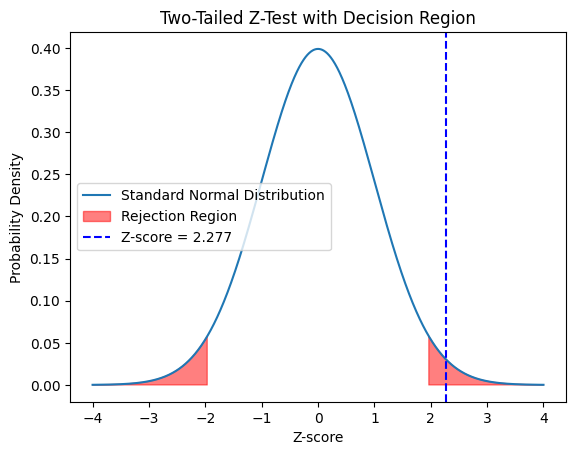

Sample Mean       : 103.60
Z-score           : 2.277
P-value           : 0.0228
Result: Reject the null hypothesis. Significant difference found.


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

sample_data = [105, 110, 98, 102, 100, 97, 108, 112, 101, 103]

population_mean = 100
population_std = 5

sample_mean = np.mean(sample_data)
n = len(sample_data)

z = (sample_mean - population_mean) / (population_std / np.sqrt(n))

p_value = 2 * (1 - norm.cdf(abs(z)))

alpha = 0.05

z_values = np.linspace(-4, 4, 1000)
pdf_values = norm.pdf(z_values, 0, 1)

plt.plot(z_values, pdf_values, label="Standard Normal Distribution")

plt.fill_between(z_values, 0, pdf_values, where=(z_values <= -norm.ppf(1-alpha/2)) | (z_values >= norm.ppf(1-alpha/2)),
                 color="red", alpha=0.5, label="Rejection Region")

plt.axvline(x=z, color="blue", linestyle="--", label=f"Z-score = {z:.3f}")

plt.title("Two-Tailed Z-Test with Decision Region")
plt.xlabel("Z-score")
plt.ylabel("Probability Density")
plt.legend()

plt.show()

print(f"Sample Mean       : {sample_mean:.2f}")
print(f"Z-score           : {z:.3f}")
print(f"P-value           : {p_value:.4f}")

if p_value < alpha:
    print("Result: Reject the null hypothesis. Significant difference found.")
else:
    print("Result: Fail to reject the null hypothesis. No significant difference.")


5 .  Create a Python function that calculates and visualizes Type 1 and Type 2 errors during hypothesis testing ?

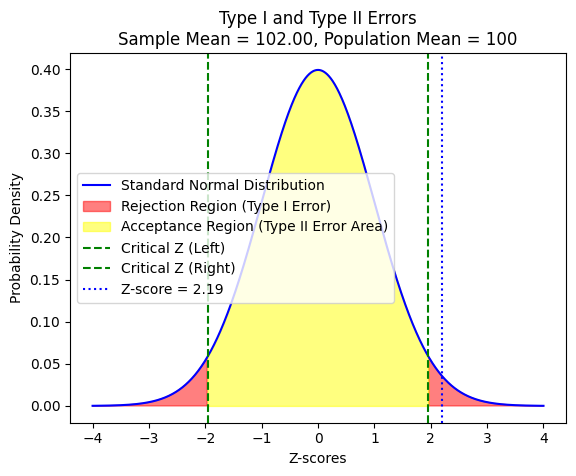

Calculated Z-score: 2.19
Critical Z-values (Rejection region): -1.96, 1.96
Type I Error Rate (alpha) = 0.0500
Type II Error Rate (beta) = 0.0002


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def visualize_type_1_2_errors(sample_mean, population_mean, population_std, n, alpha=0.05):

    z = (sample_mean - population_mean) / (population_std / np.sqrt(n))

    z_critical = norm.ppf(1 - alpha / 2)

    rejection_region_left = -z_critical
    rejection_region_right = z_critical

    true_population_mean = 105
    beta = norm.cdf(z_critical - (true_population_mean - population_mean) / (population_std / np.sqrt(n))) - \
           norm.cdf(-z_critical - (true_population_mean - population_mean) / (population_std / np.sqrt(n)))


    z_values = np.linspace(-4, 4, 1000)
    pdf_values = norm.pdf(z_values, 0, 1)

    plt.plot(z_values, pdf_values, label="Standard Normal Distribution", color='blue')

    plt.fill_between(z_values, 0, pdf_values, where=(z_values <= rejection_region_left) | (z_values >= rejection_region_right),
                     color='red', alpha=0.5, label="Rejection Region (Type I Error)")

    plt.fill_between(z_values, 0, pdf_values, where=(z_values > rejection_region_left) & (z_values < rejection_region_right),
                     color='yellow', alpha=0.5, label="Acceptance Region (Type II Error Area)")

    plt.axvline(x=rejection_region_left, color="green", linestyle="--", label="Critical Z (Left)")
    plt.axvline(x=rejection_region_right, color="green", linestyle="--", label="Critical Z (Right)")

    plt.axvline(x=z, color="blue", linestyle=":", label=f"Z-score = {z:.2f}")

    plt.title(f"Type I and Type II Errors\nSample Mean = {sample_mean:.2f}, Population Mean = {population_mean}")
    plt.xlabel("Z-scores")
    plt.ylabel("Probability Density")
    plt.legend()

    plt.show()

    print(f"Calculated Z-score: {z:.2f}")
    print(f"Critical Z-values (Rejection region): {rejection_region_left:.2f}, {rejection_region_right:.2f}")
    print(f"Type I Error Rate (alpha) = {alpha:.4f}")
    print(f"Type II Error Rate (beta) = {beta:.4f}")

sample_mean = 102
population_mean = 100
population_std = 5
n = 30

visualize_type_1_2_errors(sample_mean, population_mean, population_std, n)


6 . Write a Python program to perform an independent T-test and interpret the results ?

In [6]:
import numpy as np
from scipy import stats

group_1 = [55, 67, 75, 80, 65, 72, 68, 78, 60, 77]
group_2 = [85, 88, 92, 90, 93, 95, 87, 91, 85, 89]

t_stat, p_value = stats.ttest_ind(group_1, group_2)

print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_value:.4f}")

alpha = 0.05

if p_value < alpha:
    print("Result: Reject the null hypothesis. The means of the two groups are significantly different.")
else:
    print("Result: Fail to reject the null hypothesis. The means of the two groups are not significantly different.")


T-statistic: -7.076
P-value: 0.0000
Result: Reject the null hypothesis. The means of the two groups are significantly different.


7 . Perform a paired sample T-test using Python and visualize the comparison results ?

T-statistic: -12.836
P-value: 0.0000
Result: Reject the null hypothesis. The means of the two groups are significantly different.


<ipython-input-7-19df34118f99>:21: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([before_treatment, after_treatment], labels=['Before Treatment', 'After Treatment'], patch_artist=True)


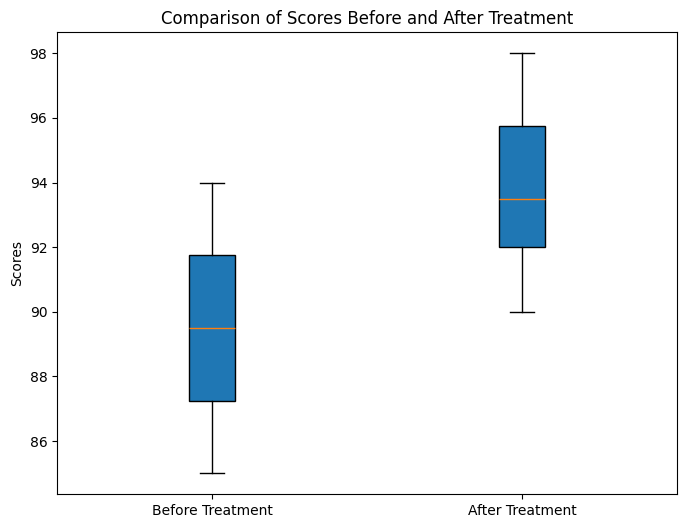

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

before_treatment = [85, 90, 88, 92, 86, 89, 91, 87, 93, 94]
after_treatment = [90, 93, 91, 95, 92, 94, 96, 92, 97, 98]

t_stat, p_value = stats.ttest_rel(before_treatment, after_treatment)

print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_value:.4f}")

alpha = 0.05

if p_value < alpha:
    print("Result: Reject the null hypothesis. The means of the two groups are significantly different.")
else:
    print("Result: Fail to reject the null hypothesis. The means of the two groups are not significantly different.")

plt.figure(figsize=(8, 6))
plt.boxplot([before_treatment, after_treatment], labels=['Before Treatment', 'After Treatment'], patch_artist=True)
plt.title('Comparison of Scores Before and After Treatment')
plt.ylabel('Scores')
plt.show()


8 . Simulate data and perform both Z-test and T-test, then compare the results using Python ?

Z-test Statistics: -1.594
Z-test P-value: 0.1109
T-test Statistics: -1.708
T-test P-value: 0.0940

Interpretation:
Z-test: Fail to reject the null hypothesis. The sample mean is not significantly different from the population mean.
T-test: Fail to reject the null hypothesis. The sample mean is not significantly different from the population mean.


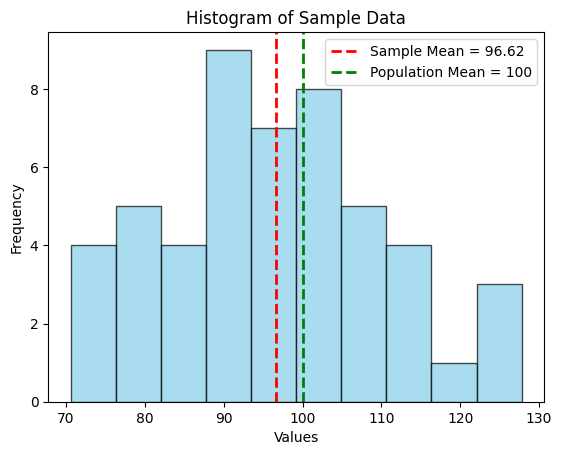

In [8]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

np.random.seed(42)
population_mean = 100
population_std = 15
sample_size = 50

sample_data = np.random.normal(population_mean, population_std, sample_size)

pop_mean = 100
pop_std = 15

sample_mean = np.mean(sample_data)
sample_std = np.std(sample_data, ddof=1)

z_stat = (sample_mean - pop_mean) / (pop_std / np.sqrt(sample_size))
z_p_value = 2 * (1 - stats.norm.cdf(abs(z_stat)))


t_stat, t_p_value = stats.ttest_1samp(sample_data, pop_mean)


print(f"Z-test Statistics: {z_stat:.3f}")
print(f"Z-test P-value: {z_p_value:.4f}")
print(f"T-test Statistics: {t_stat:.3f}")
print(f"T-test P-value: {t_p_value:.4f}")

alpha = 0.05

print("\nInterpretation:")

if z_p_value < alpha:
    print("Z-test: Reject the null hypothesis. The sample mean is significantly different from the population mean.")
else:
    print("Z-test: Fail to reject the null hypothesis. The sample mean is not significantly different from the population mean.")

if t_p_value < alpha:
    print("T-test: Reject the null hypothesis. The sample mean is significantly different from the population mean.")
else:
    print("T-test: Fail to reject the null hypothesis. The sample mean is not significantly different from the population mean.")

plt.hist(sample_data, bins=10, color='skyblue', edgecolor='black', alpha=0.7)
plt.axvline(sample_mean, color='red', linestyle='dashed', linewidth=2, label=f"Sample Mean = {sample_mean:.2f}")
plt.axvline(pop_mean, color='green', linestyle='dashed', linewidth=2, label=f"Population Mean = {pop_mean}")
plt.title("Histogram of Sample Data")
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.legend()
plt.show()


9 . Write a Python function to calculate the confidence interval for a sample mean and explain its significance ?

In [9]:
import numpy as np
from scipy import stats

def confidence_interval(data, confidence_level=0.95):

    sample_mean = np.mean(data)
    sample_std = np.std(data, ddof=1)
    sample_size = len(data)

    alpha = 1 - confidence_level
    t_critical = stats.t.ppf(1 - alpha/2, df=sample_size - 1)

    std_error = sample_std / np.sqrt(sample_size)

    margin_of_error = t_critical * std_error

    lower_bound = sample_mean - margin_of_error
    upper_bound = sample_mean + margin_of_error

    return lower_bound, upper_bound

np.random.seed(42)
data = np.random.normal(75, 10, 30)

lower, upper = confidence_interval(data, confidence_level=0.95)

print(f"Sample Mean: {np.mean(data):.2f}")
print(f"95% Confidence Interval: ({lower:.2f}, {upper:.2f})")


Sample Mean: 73.12
95% Confidence Interval: (69.76, 76.48)


10 . Write a Python program to calculate the margin of error for a given confidence level using sample data ?

In [10]:
import numpy as np
from scipy import stats

def margin_of_error(data, confidence_level=0.95):

    sample_mean = np.mean(data)
    sample_std = np.std(data, ddof=1)
    sample_size = len(data)

    alpha = 1 - confidence_level
    t_critical = stats.t.ppf(1 - alpha/2, df=sample_size - 1)

    std_error = sample_std / np.sqrt(sample_size)

    margin_of_error = t_critical * std_error

    return margin_of_error

np.random.seed(42)
data = np.random.normal(75, 10, 30)

moe = margin_of_error(data, confidence_level=0.95)

print(f"Sample Mean: {np.mean(data):.2f}")
print(f"Sample Standard Deviation: {np.std(data, ddof=1):.2f}")
print(f"Margin of Error (95% Confidence): {moe:.2f}")


Sample Mean: 73.12
Sample Standard Deviation: 9.00
Margin of Error (95% Confidence): 3.36


11 . Implement a Bayesian inference method using Bayes' Theorem in Python and explain the process ?

In [12]:
def bayesian_inference(prior, likelihood, false_positive_rate, evidence):

    total_evidence = (likelihood * prior) + (false_positive_rate * (1 - prior))

    posterior = (likelihood * prior) / total_evidence

    return posterior

prior = 0.01
likelihood = 0.95
false_positive_rate = 0.05

evidence = (likelihood * prior) + (false_positive_rate * (1 - prior))

posterior = bayesian_inference(prior, likelihood, false_positive_rate, evidence)

print(f"Prior Probability (P(H)): {prior}")
print(f"Likelihood (P(E|H)): {likelihood}")
print(f"False Positive Rate (P(E|¬H)): {false_positive_rate}")
print(f"Marginal Likelihood (P(E)): {evidence:.4f}")
print(f"Posterior Probability (P(H|E)): {posterior:.4f}")


Prior Probability (P(H)): 0.01
Likelihood (P(E|H)): 0.95
False Positive Rate (P(E|¬H)): 0.05
Marginal Likelihood (P(E)): 0.0590
Posterior Probability (P(H|E)): 0.1610


12 . Perform a Chi-square test for independence between two categorical variables in Python ?

In [13]:
import numpy as np
import pandas as pd
from scipy.stats import chi2_contingency

data = np.array([[50, 30],
                 [20, 40]])

df = pd.DataFrame(data, columns=['Smoke', 'No Smoke'], index=['Male', 'Female'])
print("Contingency Table:")
print(df)

chi2_stat, p_value, dof, expected = chi2_contingency(data)

print("\nChi-square Test Results:")
print(f"Chi-square Statistic: {chi2_stat:.4f}")
print(f"Degrees of Freedom: {dof}")
print(f"Expected Frequencies:\n{expected}")
print(f"P-value: {p_value:.4f}")

if p_value < 0.05:
    print("\nReject the null hypothesis: There is a significant association between gender and smoking habit.")
else:
    print("\nFail to reject the null hypothesis: There is no significant association between gender and smoking habit.")


Contingency Table:
        Smoke  No Smoke
Male       50        30
Female     20        40

Chi-square Test Results:
Chi-square Statistic: 10.5292
Degrees of Freedom: 1
Expected Frequencies:
[[40. 40.]
 [30. 30.]]
P-value: 0.0012

Reject the null hypothesis: There is a significant association between gender and smoking habit.


13 .  Write a Python program to calculate the expected frequencies for a Chi-square test based on observed
data ?

In [14]:
import numpy as np

def calculate_expected_frequencies(observed_data):

    observed = np.array(observed_data)

    row_totals = observed.sum(axis=1)
    column_totals = observed.sum(axis=0)
    grand_total = observed.sum()

    expected = np.outer(row_totals, column_totals) / grand_total

    return expected

observed_data = np.array([[50, 30],
                          [20, 40]])

expected_frequencies = calculate_expected_frequencies(observed_data)

print("Observed Frequencies:")
print(observed_data)

print("\nExpected Frequencies:")
print(np.round(expected_frequencies, 2))


Observed Frequencies:
[[50 30]
 [20 40]]

Expected Frequencies:
[[40. 40.]
 [30. 30.]]


14 .  Perform a goodness-of-fit test using Python to compare the observed data to an expected distribution ?

In [15]:
import numpy as np
from scipy.stats import chisquare

observed_data = [9, 11, 10, 8, 12, 10]

expected_data = [10, 10, 10, 10, 10, 10]

chi2_stat, p_value = chisquare(observed_data, expected_data)

print(f"Chi-square Statistic: {chi2_stat:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value < 0.05:
    print("\nReject the null hypothesis: The observed data does not fit the expected distribution.")
else:
    print("\nFail to reject the null hypothesis: The observed data fits the expected distribution.")


Chi-square Statistic: 1.0000
P-value: 0.9626

Fail to reject the null hypothesis: The observed data fits the expected distribution.


15 . Create a Python script to simulate and visualize the Chi-square distribution and discuss its characteristics ?

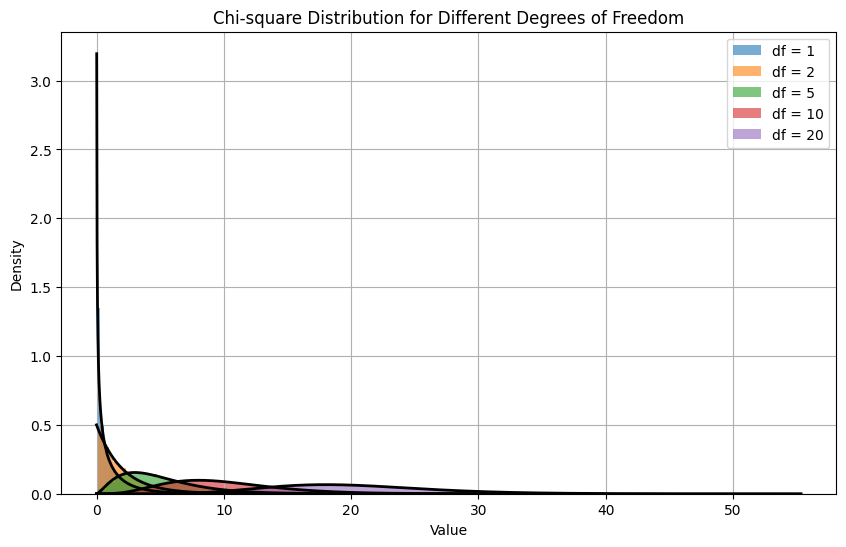

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2

def plot_chi_square_distribution(degrees_of_freedom_list, size=10000):

    plt.figure(figsize=(10, 6))

    for df in degrees_of_freedom_list:

        data = np.random.chisquare(df, size)

        plt.hist(data, bins=50, density=True, alpha=0.6, label=f'df = {df}')

        x = np.linspace(0, np.max(data), 1000)
        plt.plot(x, chi2.pdf(x, df), 'k-', lw=2)

    plt.title('Chi-square Distribution for Different Degrees of Freedom')
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.legend()
    plt.grid(True)
    plt.show()

degrees_of_freedom_list = [1, 2, 5, 10, 20]

plot_chi_square_distribution(degrees_of_freedom_list)


16 . Implement an F-test using Python to compare the variances of two random samples ?

In [17]:
import numpy as np
from scipy.stats import f

def f_test(sample1, sample2, alpha=0.05):

    var1 = np.var(sample1, ddof=1)
    var2 = np.var(sample2, ddof=1)

    F_stat = var1 / var2 if var1 > var2 else var2 / var1

    df1 = len(sample1) - 1
    df2 = len(sample2) - 1

    p_value = 1 - f.cdf(F_stat, df1, df2)

    if p_value < alpha:
        decision = "Reject the null hypothesis: The variances are significantly different."
    else:
        decision = "Fail to reject the null hypothesis: The variances are not significantly different."

    return F_stat, p_value, decision

np.random.seed(0)
sample1 = np.random.normal(loc=50, scale=10, size=100)
sample2 = np.random.normal(loc=55, scale=15, size=100)

F_stat, p_value, decision = f_test(sample1, sample2)

print(f"F-statistic: {F_stat:.4f}")
print(f"P-value: {p_value:.4f}")
print(decision)


F-statistic: 2.3712
P-value: 0.0000
Reject the null hypothesis: The variances are significantly different.


17 . Write a Python program to perform an ANOVA test to compare means between multiple groups and
interpret the results ?

In [18]:
import numpy as np
from scipy.stats import f_oneway

def anova_test(*groups, alpha=0.05):

    F_stat, p_value = f_oneway(*groups)

    if p_value < alpha:
        decision = "Reject the null hypothesis: At least one group mean is significantly different."
    else:
        decision = "Fail to reject the null hypothesis: There is no significant difference in means."

    return F_stat, p_value, decision

np.random.seed(0)
group1 = np.random.normal(loc=50, scale=10, size=30)
group2 = np.random.normal(loc=55, scale=10, size=30)
group3 = np.random.normal(loc=60, scale=10, size=30)

F_stat, p_value, decision = anova_test(group1, group2, group3)

print(f"F-statistic: {F_stat:.4f}")
print(f"P-value: {p_value:.4f}")
print(decision)


F-statistic: 3.3415
P-value: 0.0400
Reject the null hypothesis: At least one group mean is significantly different.


18 . Perform a one-way ANOVA test using Python to compare the means of different groups and plot the results ?

One-way ANOVA Results:
F-statistic: 17.8156
P-value: 0.0000
Conclusion: Reject the null hypothesis — at least one group mean is different.


<ipython-input-19-6f06d4015006>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Group', y='Scores', data=df, palette="Set2")


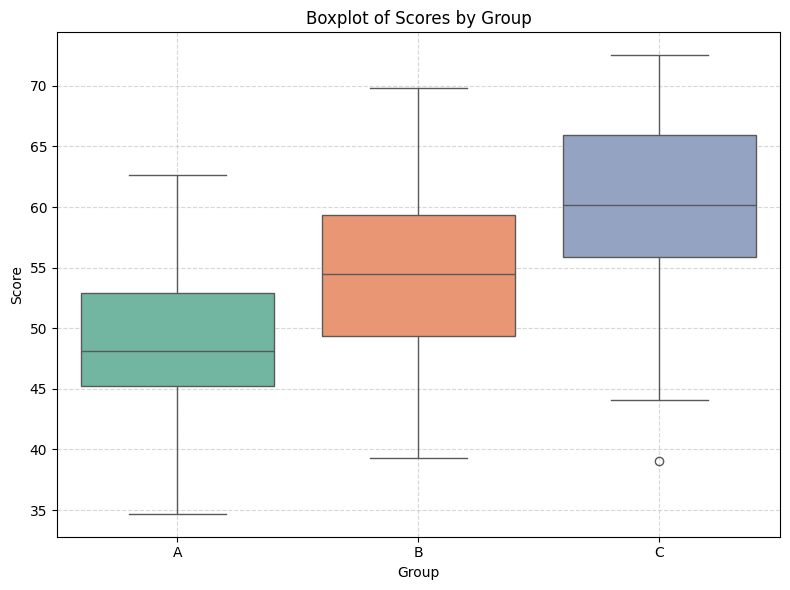

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway

np.random.seed(42)

group_A = np.random.normal(loc=50, scale=8, size=30)
group_B = np.random.normal(loc=55, scale=8, size=30)
group_C = np.random.normal(loc=60, scale=8, size=30)

F_stat, p_value = f_oneway(group_A, group_B, group_C)

print("One-way ANOVA Results:")
print(f"F-statistic: {F_stat:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value < 0.05:
    print("Conclusion: Reject the null hypothesis — at least one group mean is different.")
else:
    print("Conclusion: Fail to reject the null hypothesis — no significant difference in means.")

import pandas as pd

df = pd.DataFrame({
    'Scores': np.concatenate([group_A, group_B, group_C]),
    'Group': ['A']*len(group_A) + ['B']*len(group_B) + ['C']*len(group_C)
})

plt.figure(figsize=(8, 6))
sns.boxplot(x='Group', y='Scores', data=df, palette="Set2")
plt.title('Boxplot of Scores by Group')
plt.ylabel('Score')
plt.xlabel('Group')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


19 . Write a Python function to check the assumptions (normality, independence, and equal variance) for ANOVA ?

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, levene, probplot
from statsmodels.formula.api import ols
import statsmodels.api as sm

def check_anova_assumptions(data: pd.DataFrame, group_col: str, value_col: str):


    print("\n=== STEP 1: Equal Variance Assumption (Levene's Test) ===")
    groups = [group[value_col].values for name, group in data.groupby(group_col)]
    stat, p = levene(*groups)
    print(f"Levene’s statistic: {stat:.4f}, p-value: {p:.4f} =>",
          "✔️ Equal variances" if p > 0.05 else "❌ Unequal variances")

    print("\n=== STEP 2: Fit ANOVA Model and Get Residuals ===")
    model = ols(f'{value_col} ~ C({group_col})', data=data).fit()
    residuals = model.resid
    fitted = model.fittedvalues

    print("\n=== STEP 3: Normality of Residuals (Shapiro-Wilk Test) ===")
    stat, p = shapiro(residuals)
    print(f"Shapiro-Wilk statistic: {stat:.4f}, p-value: {p:.4f} =>",
          "✔️ Residuals are normal" if p > 0.05 else "❌ Residuals are not normal")

    print("\n=== STEP 4: Visual Checks ===")
    fig, axs = plt.subplots(1, 3, figsize=(18, 5))

    probplot(residuals, dist="norm", plot=axs[0])
    axs[0].set_title("Q-Q Plot (Residuals)")

    axs[1].scatter(fitted, residuals, edgecolors='k')
    axs[1].axhline(y=0, color='r', linestyle='--')
    axs[1].set_title("Residuals vs Fitted")
    axs[1].set_xlabel("Fitted values")
    axs[1].set_ylabel("Residuals")

    sns.boxplot(x=group_col, y=value_col, data=data, ax=axs[2], palette='Set2')
    axs[2].set_title("Boxplot by Group")

    plt.tight_layout()
    plt.show()

20 .  Perform a two-way ANOVA test using Python to study the interaction between two factors and visualize the
results ?

=== Two-Way ANOVA Results ===
                             sum_sq    df           F        PR(>F)
C(Factor_A)              194.451480   1.0  118.494059  3.115540e-15
C(Factor_B)               49.504610   2.0   15.083460  6.249033e-06
C(Factor_A):C(Factor_B)   29.660358   2.0    9.037155  4.116786e-04
Residual                  88.615244  54.0         NaN           NaN


<ipython-input-28-c04650605d03>:35: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1}` instead.

  sns.pointplot(x='Factor_B', y='Score', hue='Factor_A', data=df,


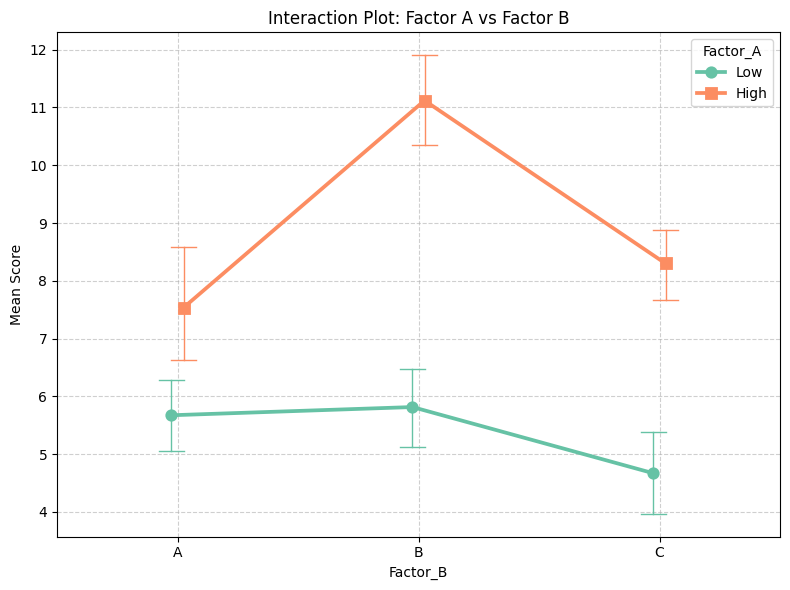

In [28]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns


np.random.seed(42)

factor_A = np.repeat(['Low', 'High'], 30)
factor_B = np.tile(np.repeat(['A', 'B', 'C'], 10), 2)

data_values = (
    5 +
    (np.array(factor_A) == 'High') * 3 +
    (np.array(factor_B) == 'B') * 2 +
    (np.array(factor_A) == 'High') * (np.array(factor_B) == 'B') * 1.5 +
    np.random.normal(0, 1.5, 60)
)

df = pd.DataFrame({
    'Factor_A': factor_A,
    'Factor_B': factor_B,
    'Score': data_values
})

model = ols('Score ~ C(Factor_A) * C(Factor_B)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print("=== Two-Way ANOVA Results ===")
print(anova_table)

plt.figure(figsize=(8, 6))
sns.pointplot(x='Factor_B', y='Score', hue='Factor_A', data=df,
              palette='Set2', dodge=True, markers=['o', 's'], capsize=.1, errwidth=1)
plt.title('Interaction Plot: Factor A vs Factor B')
plt.ylabel('Mean Score')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


21 . Write a Python program to visualize the F-distribution and discuss its use in hypothesis testing ?

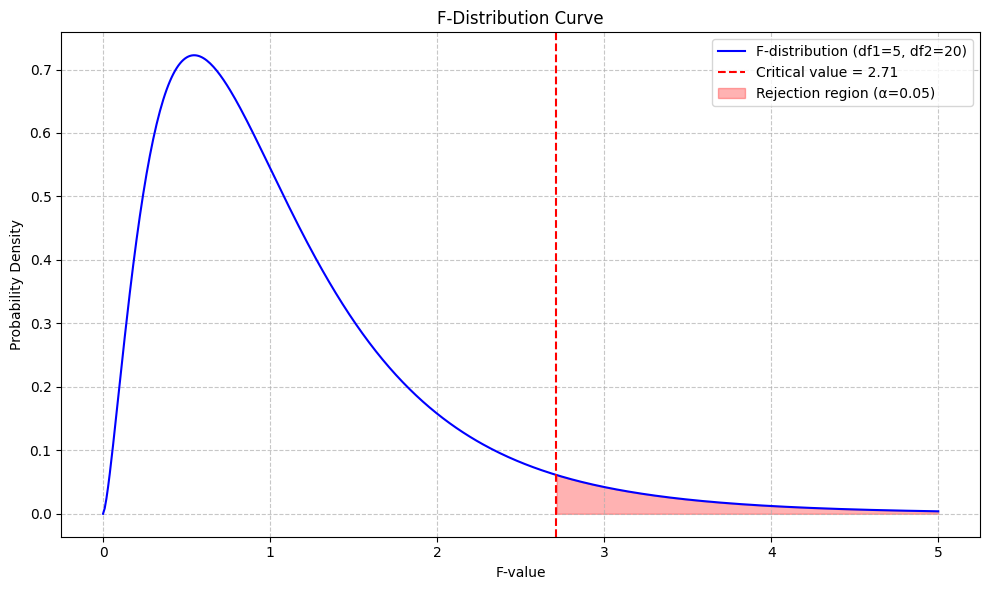

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import f

df1 = 5
df2 = 20

x = np.linspace(0, 5, 500)
y = f.pdf(x, df1, df2)

alpha = 0.05
f_critical = f.ppf(1 - alpha, df1, df2)

plt.figure(figsize=(10, 6))
plt.plot(x, y, label=f'F-distribution (df1={df1}, df2={df2})', color='blue')
plt.axvline(f_critical, color='red', linestyle='--', label=f'Critical value = {f_critical:.2f}')
plt.fill_between(x, y, where=(x >= f_critical), color='red', alpha=0.3, label='Rejection region (α=0.05)')

plt.title('F-Distribution Curve')
plt.xlabel('F-value')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


22 . Perform a one-way ANOVA test in Python and visualize the results with boxplots to compare group means ?

=== One-Way ANOVA Results ===
F-statistic: 9.6776
P-value: 0.0002
➡️ Result: At least one group mean is significantly different (p < 0.05)


<ipython-input-30-20afd647d6b0>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Group', y='Score', data=df, palette='Set2')


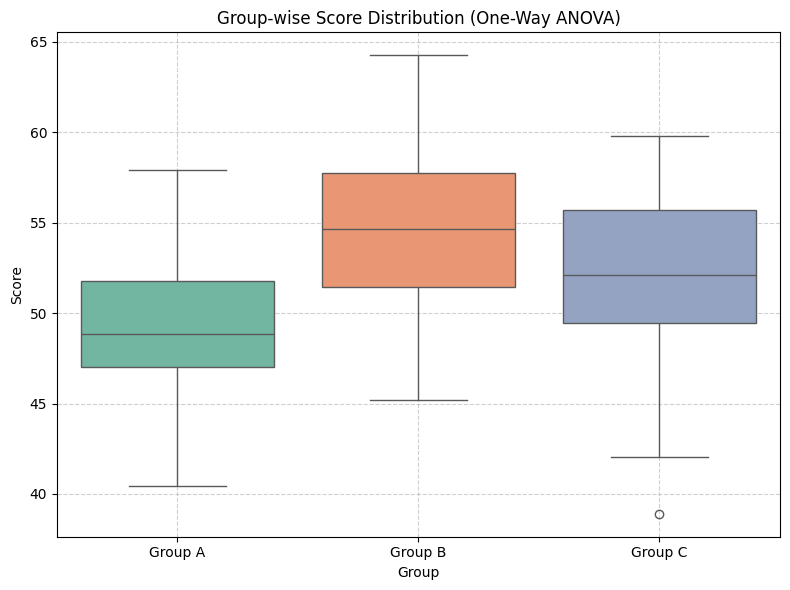

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway

np.random.seed(42)

group1 = np.random.normal(loc=50, scale=5, size=30)
group2 = np.random.normal(loc=55, scale=5, size=30)
group3 = np.random.normal(loc=52, scale=5, size=30)

df = pd.DataFrame({
    'Score': np.concatenate([group1, group2, group3]),
    'Group': ['Group A']*30 + ['Group B']*30 + ['Group C']*30
})

f_stat, p_val = f_oneway(
    df[df['Group'] == 'Group A']['Score'],
    df[df['Group'] == 'Group B']['Score'],
    df[df['Group'] == 'Group C']['Score']
)

print("=== One-Way ANOVA Results ===")
print(f"F-statistic: {f_stat:.4f}")
print(f"P-value: {p_val:.4f}")
if p_val < 0.05:
    print("➡️ Result: At least one group mean is significantly different (p < 0.05)")
else:
    print("➡️ Result: No significant difference between group means (p ≥ 0.05)")

plt.figure(figsize=(8, 6))
sns.boxplot(x='Group', y='Score', data=df, palette='Set2')
plt.title('Group-wise Score Distribution (One-Way ANOVA)')
plt.ylabel('Score')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


23 .  Simulate random data from a normal distribution, then perform hypothesis testing to evaluate the means ?

=== One-Sample T-Test ===
Sample mean: 50.91
T-statistic: 1.2039
P-value: 0.2359
➡️ Fail to reject the null hypothesis (no significant difference).


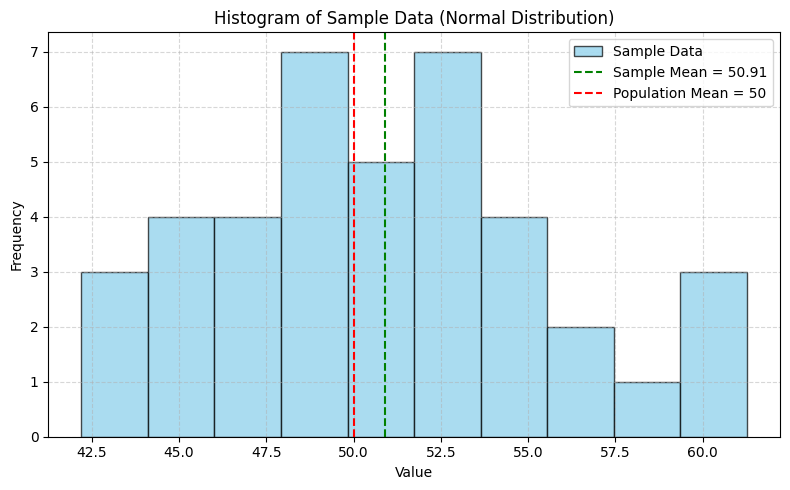

In [31]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

np.random.seed(42)
sample = np.random.normal(loc=52, scale=5, size=40)

population_mean = 50
alpha = 0.05

t_stat, p_val = stats.ttest_1samp(sample, population_mean)

print("=== One-Sample T-Test ===")
print(f"Sample mean: {np.mean(sample):.2f}")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_val:.4f}")
if p_val < alpha:
    print("➡️ Reject the null hypothesis (significant difference from population mean).")
else:
    print("➡️ Fail to reject the null hypothesis (no significant difference).")

plt.figure(figsize=(8, 5))
plt.hist(sample, bins=10, color='skyblue', edgecolor='black', alpha=0.7, label='Sample Data')
plt.axvline(np.mean(sample), color='green', linestyle='--', label=f"Sample Mean = {np.mean(sample):.2f}")
plt.axvline(population_mean, color='red', linestyle='--', label=f"Population Mean = {population_mean}")
plt.title("Histogram of Sample Data (Normal Distribution)")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


24 . Perform a hypothesis test for population variance using a Chi-square distribution and interpret the results ?

In [33]:
import numpy as np
from scipy.stats import chi2

np.random.seed(42)
sample = np.random.normal(loc=50, scale=5, size=30)

sample_size = len(sample)
sample_variance = np.var(sample, ddof=1)
sigma0_squared = 25
alpha = 0.05

chi2_stat = (sample_size - 1) * sample_variance / sigma0_squared

chi2_critical_low = chi2.ppf(alpha / 2, df=sample_size - 1)
chi2_critical_high = chi2.ppf(1 - alpha / 2, df=sample_size - 1)

print("=== Chi-Square Test for Variance ===")
print(f"Sample variance: {sample_variance:.2f}")
print(f"Chi-square statistic: {chi2_stat:.2f}")
print(f"Critical values: {chi2_critical_low:.2f} (low), {chi2_critical_high:.2f} (high)")

if chi2_stat < chi2_critical_low or chi2_stat > chi2_critical_high:
    print("➡️ Reject the null hypothesis: Sample variance is significantly different.")
else:
    print("➡️ Fail to reject the null hypothesis: No significant difference in variance.")


=== Chi-Square Test for Variance ===
Sample variance: 20.25
Chi-square statistic: 23.49
Critical values: 16.05 (low), 45.72 (high)
➡️ Fail to reject the null hypothesis: No significant difference in variance.


25 .  Write a Python script to perform a Z-test for comparing proportions between two datasets or groups ?


In [34]:
import numpy as np
from statsmodels.stats.proportion import proportions_ztest

successes = np.array([60, 45])
nobs = np.array([100, 90])

z_stat, p_val = proportions_ztest(successes, nobs, alternative='two-sided')

print("=== Two-Proportion Z-Test ===")
print(f"Z-statistic: {z_stat:.4f}")
print(f"P-value: {p_val:.4f}")

if p_val < 0.05:
    print("➡️ Reject the null hypothesis: Proportions are significantly different.")
else:
    print("➡️ Fail to reject the null hypothesis: No significant difference in proportions.")


=== Two-Proportion Z-Test ===
Z-statistic: 1.3842
P-value: 0.1663
➡️ Fail to reject the null hypothesis: No significant difference in proportions.


26 .  Implement an F-test for comparing the variances of two datasets, then interpret and visualize the results ?

=== F-test for Equal Variances ===
Variance 1: 81.00, Variance 2: 21.67
F-statistic: 3.7373
Critical F-values: 0.4760 (low), 2.1010 (high)
➡️ Reject the null hypothesis: Variances are significantly different.


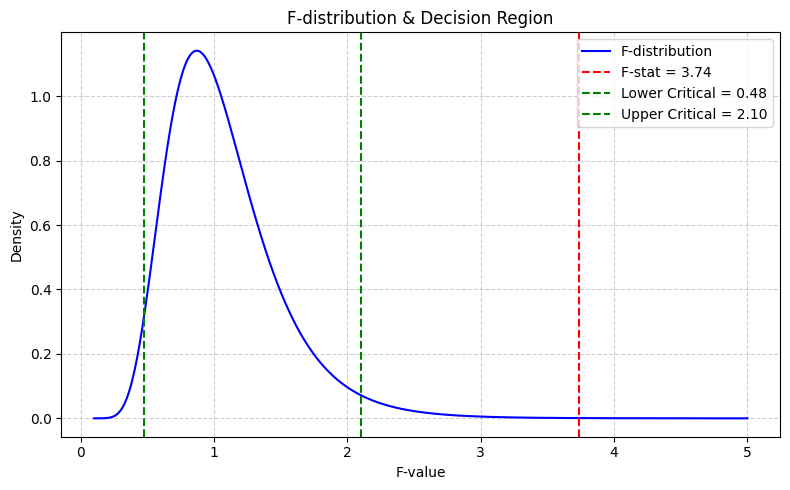

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import f


np.random.seed(42)
group1 = np.random.normal(loc=50, scale=10, size=30)
group2 = np.random.normal(loc=50, scale=5, size=30)

var1 = np.var(group1, ddof=1)
var2 = np.var(group2, ddof=1)

if var1 > var2:
    f_stat = var1 / var2
    dfn, dfd = len(group1) - 1, len(group2) - 1
else:
    f_stat = var2 / var1
    dfn, dfd = len(group2) - 1, len(group1) - 1

alpha = 0.05
f_crit_low = f.ppf(alpha / 2, dfn, dfd)
f_crit_high = f.ppf(1 - alpha / 2, dfn, dfd)

print("=== F-test for Equal Variances ===")
print(f"Variance 1: {var1:.2f}, Variance 2: {var2:.2f}")
print(f"F-statistic: {f_stat:.4f}")
print(f"Critical F-values: {f_crit_low:.4f} (low), {f_crit_high:.4f} (high)")

if f_stat < f_crit_low or f_stat > f_crit_high:
    print("➡️ Reject the null hypothesis: Variances are significantly different.")
else:
    print("➡️ Fail to reject the null hypothesis: No significant difference in variances.")

x = np.linspace(0.1, 5, 500)
y = f.pdf(x, dfn, dfd)

plt.figure(figsize=(8, 5))
plt.plot(x, y, label="F-distribution", color='blue')
plt.axvline(f_stat, color='red', linestyle='--', label=f'F-stat = {f_stat:.2f}')
plt.axvline(f_crit_low, color='green', linestyle='--', label=f'Lower Critical = {f_crit_low:.2f}')
plt.axvline(f_crit_high, color='green', linestyle='--', label=f'Upper Critical = {f_crit_high:.2f}')
plt.title('F-distribution & Decision Region')
plt.xlabel('F-value')
plt.ylabel('Density')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


27 . Perform a Chi-square test for goodness of fit with simulated data and analyze the results ?

=== Chi-Square Goodness of Fit Test ===
Observed frequencies: [11 19 11 25 17 17]
Expected frequencies: [16.66666667 16.66666667 16.66666667 16.66666667 16.66666667 16.66666667]
Chi-square statistic: 8.3600
P-value: 0.1375
➡️ Fail to reject the null hypothesis: The data follows the expected distribution.


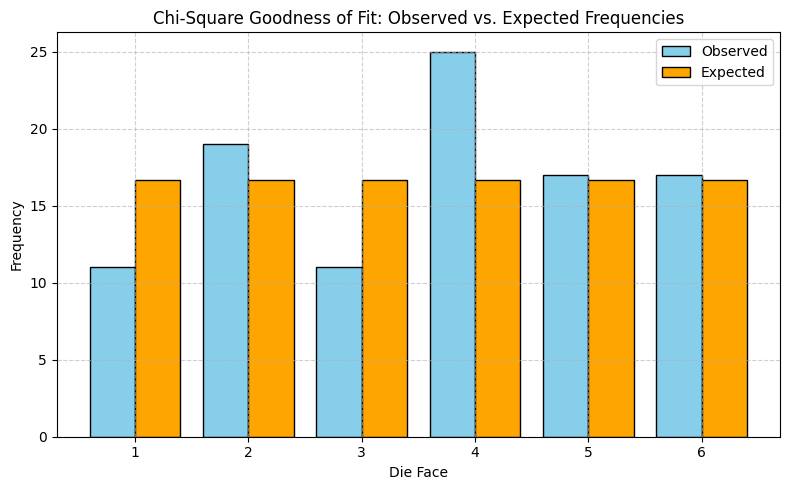

In [36]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

np.random.seed(42)
observed = np.random.choice([1, 2, 3, 4, 5, 6], size=100, replace=True)

observed_freq = np.array([np.sum(observed == i) for i in range(1, 7)])

expected_freq = np.array([100 / 6] * 6)

chi2_stat, p_val = stats.chisquare(observed_freq, expected_freq)

print("=== Chi-Square Goodness of Fit Test ===")
print(f"Observed frequencies: {observed_freq}")
print(f"Expected frequencies: {expected_freq}")
print(f"Chi-square statistic: {chi2_stat:.4f}")
print(f"P-value: {p_val:.4f}")


if p_val < 0.05:
    print("➡️ Reject the null hypothesis: The data does not follow the expected distribution.")
else:
    print("➡️ Fail to reject the null hypothesis: The data follows the expected distribution.")


x = np.arange(1, 7)
plt.figure(figsize=(8, 5))
plt.bar(x - 0.2, observed_freq, 0.4, label="Observed", color='skyblue', edgecolor='black')
plt.bar(x + 0.2, expected_freq, 0.4, label="Expected", color='orange', edgecolor='black')
plt.xlabel('Die Face')
plt.ylabel('Frequency')
plt.title('Chi-Square Goodness of Fit: Observed vs. Expected Frequencies')
plt.xticks(x)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
